# **2.3 Tensile behavior of brittle-matrix composite**

# **Model 1:** Deterministic matrix strength (ACK model)

The typical shape of the stress-strain curve of the composite involves three stages:
- elastic stage which is governed by the mixture rule
- stage of matrix fragmentation
- saturated crack pattern with a linear branch

How to interpret and characterize these three distinguished phases of composite material behavior?

The ACK model developed by Aveston, Cooper and Kelly is an analytical model that represents the composite tensile response by a trilinear law as shown in the following figure. This model is based on the following assumptions:
- The bond behavior is governed by a constant frictional bond in the debonded interface
- The constitutive law for both reinforcement and matrix is assumed to be linear-elastic with brittle failure upon reaching their strengths
- Multiple cracking occurs at a constant level of applied stress, inducing a horizontal branch in the stress-strain behavior

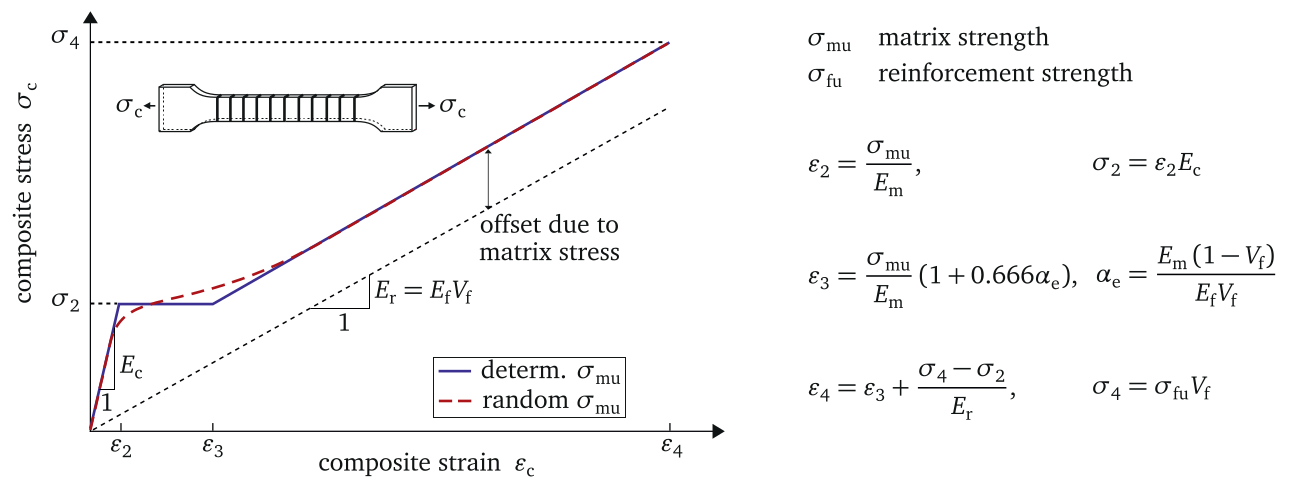

## Stress-strain curve

The trilinear curve of ACK model represents the composite tensile response by identifying the following characteristic points:
- [$\sigma_{1}, \varepsilon_{1}$]: The inital values of stress and strain are set to zero. 
- [$\sigma_{2}, \varepsilon_{2}$]: In the first stage, the matrix is uncracked and perfect bond between matrix and fabric is assumed up to the first cracking stress $\sigma_{2}$ , which is defined as 
\begin{align}
\sigma_{2} = E_\mathrm{c} \varepsilon_{2}
\end{align}
where $\varepsilon_{2}$ is the composite strain value at which the matrix cracks and $E_\mathrm{c}$ is the composite stiffness. 
The strain $\varepsilon_{2}$ is given as
\begin{align}
\varepsilon_{2} = \dfrac{\sigma_\mathrm{mu}}{E_\mathrm{m}}
\end{align}
where $\sigma_\mathrm{mu}$ and $E_\mathrm{m}$ are the matrix tensile strength and stiffness, respectively.
The composite stiffness has been obtained using the
[**mixture rule**](../bmcs_course/1_1_elastic_stiffness_of_the_composite.ipynb) 
and can be expressed here as:
\begin{align}
E_\mathrm{c} = E_\mathrm{f} \; V_\mathrm{f} + E_\mathrm{m} \; (1 - V_\mathrm{f})
\end{align} 
where $E_\mathrm{f}$ is the fiber stiffness, and $V_\mathrm{f}$ is denoting the fiber volume fraction (reinforcement ratio).

- [$\sigma_{3}, \varepsilon_{3}$]: The second stage is characterized by the crack propagation. In this phase, the load is
assumed to be constant up to the strain value $\varepsilon_{3}$ calculated as follows:
\begin{align}
\varepsilon_{3} = \dfrac{\sigma_\mathrm{mu}}{E_\mathrm{m}} \; (1 + 0.666  \alpha_\mathrm{e})
\end{align}
where where $\alpha_\mathrm{e}$ is an homogenization coefficient given as
\begin{align}
\alpha_\mathrm{e} = \dfrac{E_\mathrm{m} \; (1 - V_\mathrm{f}) }{E_\mathrm{f} \; V_\mathrm{f}}
\end{align}

- [$\sigma_{4}, \varepsilon_{4}$]: Finally, in the third stage, when the crack pattern is stabilized the load increases linearly up to the ultimate tensile stress $\sigma_4$  with a slope equal to $E_\mathrm{r}$
The ultimate tensile stress is given as
\begin{align}
\sigma_4 = \sigma_\mathrm{fu} \; V_\mathrm{f}
\end{align}
where $\sigma_\mathrm{fu}$ is the tensile strength of the fiber.
The slope $E_\mathrm{r}$ represents the effective stiffness of the reinforcement with respect to the whole cross section and is given as
\begin{align}
E_\mathrm{r} = E_\mathrm{f} \; V_\mathrm{f} 
\end{align}
The composilte strain at failure $\varepsilon_{4}$ is given as
\begin{align}
\varepsilon_{4} = \varepsilon_{3} + \dfrac{\sigma_\mathrm{4} - \sigma_\mathrm{2}}{E_\mathrm{r}}
\end{align}

## Crack spacing

### Matrix cracking is like car parking ?!

![SegmentLocal](../fig/Cars.gif "segment")

Consider a process where particles (cars) are randomly introduced in a system (along the street). 
They must not overlap any previously parked car. What is the average distance between two neighbouring cars?

Probabilistic analysis of the car parking problem delivers the result that the average spacing is 1.337 larger than the car length ([Wikipedia: Random sequential adsorption](https://en.wikipedia.org/wiki/Random_sequential_adsorption))

### How long is the car in a concrete tensile specimen?

The final average crack spacing $l_\mathrm{cs}$ is given as
<!-- 1.337 \; \dfrac{(1 -  V_\mathrm{f}) \; \sigma_\mathrm{mu}}{  V_\mathrm{f} \; T} \\ -->
\begin{align}
l_\mathrm{cs} &= 1.337 \; l_\mathrm{shielded} =  1.337 \; \dfrac{A_\mathrm{m} \sigma_\mathrm{mu}}{\bar{\tau}p} 
\end{align}

## Examples

### **Task 1:** Evaluate the tensile stress-strain curve
Consider a steel reinforced cross section of $100 \times 100$ mm 
reinforced with a rebar ($d = 16$ mm) diameter. 
Plot the stress-strain curve using the ACK model:

In [1]:
E_m = 25000 # 28000 # concrete stiffness [MPa]
E_f = 182000 # 210000 # reinforcement stiffnes [MPa]
sig_mu = 3 # 3 # concrete tensile strength [MPa]
sig_fu = 1380 # 500 # reinforcement strength [MPa]

Plot the composite stress-strain curve

In [2]:
%matplotlib widget
import matplotlib.pylab as plt
fig, ax = plt.subplots(1,1,figsize=(7,3))
fig.canvas.toolbar_position = 'top'
fig.canvas.header_visible = False
for V_f in [0.01, 0.015]:
    E_c = E_m * (1 - V_f) + E_f * V_f # composite stiffness
    alpha_e = E_m * (1 - V_f) / (E_f * V_f) # homogenization coefficient
    eps_1, sig_1 = 0, 0
    eps_2 = sig_mu / E_m
    sig_2 = eps_2 * E_c
    eps_3, sig_3 = sig_mu / E_m * (1 + 0.6666 * alpha_e), sig_2
    sig_4 = sig_fu * V_f
    E_r = E_f * V_f # effective reinforcement stiffness related to the composite cross section 
    eps_4 = eps_3 + (sig_4 - sig_3) / E_r
    ax.plot([eps_1, eps_2, eps_3, eps_4], [sig_1, sig_2, sig_3, sig_4], label=r'$V_\mathrm{f}$ = %g' % V_f);
    print([eps_1, eps_2, eps_3, eps_4], [sig_1, sig_2, sig_3, sig_4])
    ax.set_xlabel(r'$\varepsilon_\mathrm{c}$ [-]'); ax.set_ylabel(r'$\sigma_\mathrm{c}$ [MPa]')
    ax.plot([0,eps_4],[0,E_r*eps_4], color='black', linewidth=1, linestyle='dashed');
    ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[0, 0.00012, 0.0012078032967032966, 0.007038352747252748] [0, 3.1884, 3.1884, 13.8]
[0, 0.00012, 0.0008415395604395604, 0.007221539560439561] [0, 3.2826, 3.2826, 20.7]


In [3]:
fig.savefig('ack.pdf')

**Note** that the curve does not depend on the bond $\tau p$.

### **Task 2:** Evaluate the crack spacing

What does ACK model predict for a specimen with the dimensions $100 \times 100$ mm reinforced with 1% ratio.

In [38]:
T = 395

In [40]:
tau = 3.8*2
1.337 * A_c * sig_mu / T

20.308860759493673

In [41]:
1.337 * A_c * sig_mu / (T*1.5)

13.539240506329113